<a href="https://colab.research.google.com/github/swetharaomasadi/Data-Analysis/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
test_data=pd.read_csv('/content/DailyDelhiClimateTest.csv')
train_data=pd.read_csv('/content/DailyDelhiClimateTrain.csv')

In [ ]:
print(train_data.columns)
print(test_data.columns)
print("Test Data Shape:",test_data.shape)
print("Train Data Shape:",train_data.shape)

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')
Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')
Test Data Shape: (114, 5)
Train Data Shape: (1462, 5)


7310

In [ ]:
train_data=train_data.fillna(0)
test_data=test_data.fillna(0)

In [ ]:
train_data['date'] = pd.to_datetime(train_data['date'], errors='coerce')
test_data['date'] = pd.to_datetime(test_data['date'], errors='coerce')

train_stats = train_data.select_dtypes(include=np.number).describe().T[['mean', '50%', 'std']]
train_stats = train_stats.rename(columns={'50%': 'median'})

test_stats = test_data.select_dtypes(include=np.number).describe().T[['mean', '50%', 'std']]
test_stats = test_stats.rename(columns={'50%': 'median'})

print("Train Data Statistics:")
print(train_stats)
print("\nTest Data Statistics:")
print(test_stats)

Train Data Statistics:
                     mean       median         std
meantemp        25.495521    27.714286    7.348103
humidity        60.771702    62.625000   16.769652
wind_speed       6.802209     6.221667    4.561602
meanpressure  1011.104548  1008.563492  180.231668

Test Data Statistics:
                     mean       median        std
meantemp        21.713079    19.875000   6.360072
humidity        56.258362    57.750000  19.068083
wind_speed       8.143924     8.069444   3.588049
meanpressure  1004.035090  1012.739316  89.474692


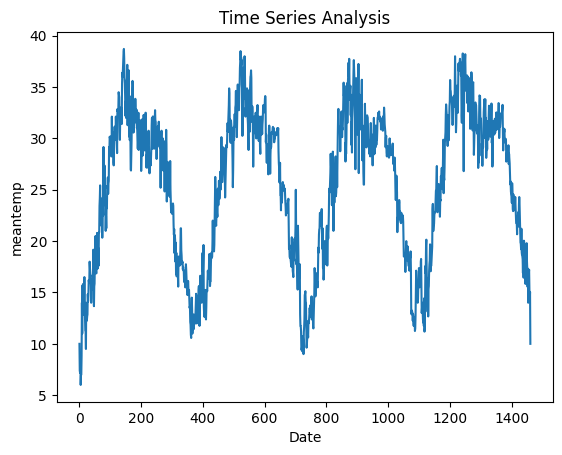

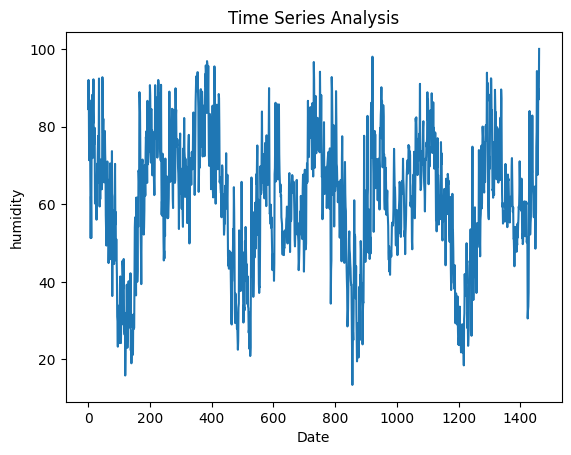

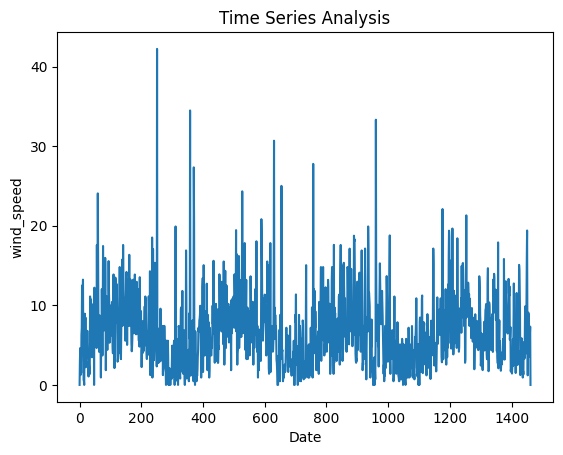

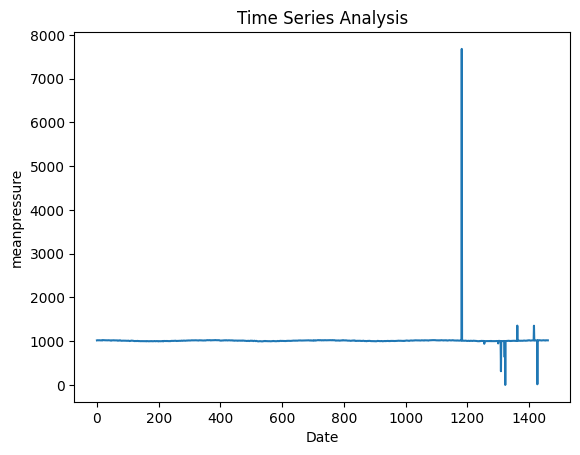

In [ ]:
import matplotlib.pyplot as plt
title="Time Series Analysis"
xlabel="Date"
for i in train_data.columns:
  if i!='date':
    ylabel=i
    plt.plot(train_data[i])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


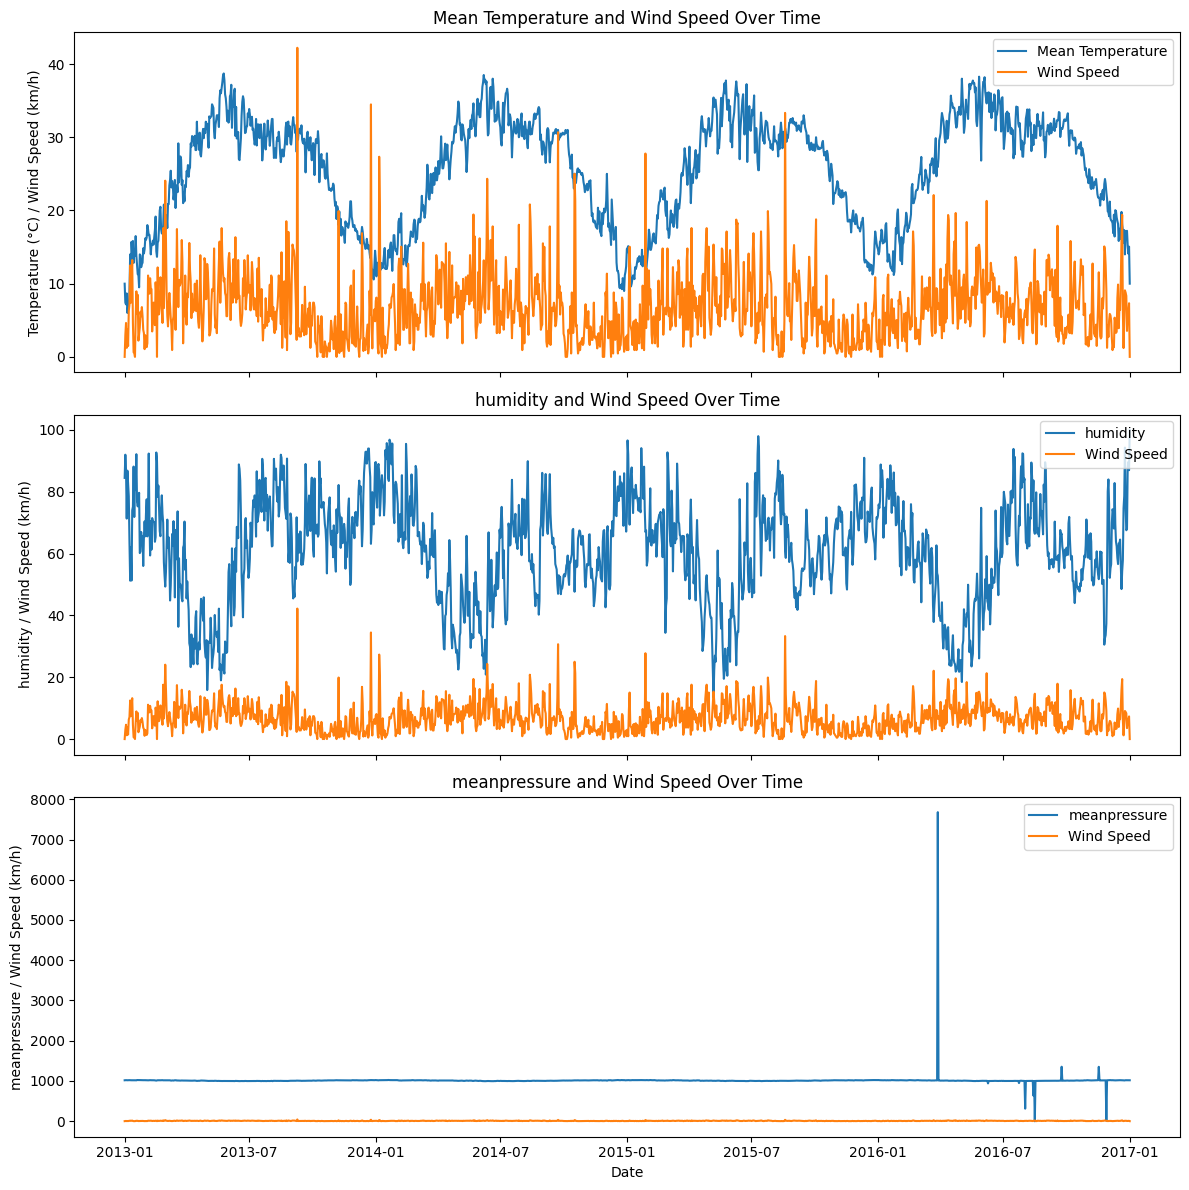

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)  # 3 rows, 1 column

axes[0].plot(train_data['date'], train_data['meantemp'], label='Mean Temperature')
axes[0].plot(train_data['date'], train_data['wind_speed'], label='Wind Speed')
axes[0].set_ylabel('Temperature (°C) / Wind Speed (km/h)')
axes[0].legend()
axes[0].set_title('Mean Temperature and Wind Speed Over Time')

axes[1].plot(train_data['date'], train_data['humidity'], label='humidity')
axes[1].plot(train_data['date'], train_data['wind_speed'], label='Wind Speed')
axes[1].set_ylabel('humidity / Wind Speed (km/h)')
axes[1].legend()
axes[1].set_title('humidity and Wind Speed Over Time')

axes[2].plot(train_data['date'], train_data['meanpressure'], label='meanpressure')
axes[2].plot(train_data['date'], train_data['wind_speed'], label='Wind Speed')
axes[2].set_ylabel('meanpressure / Wind Speed (km/h)')
axes[2].legend()
axes[2].set_title('meanpressure and Wind Speed Over Time')
axes[2].set_xlabel('Date')

plt.tight_layout()
plt.show()

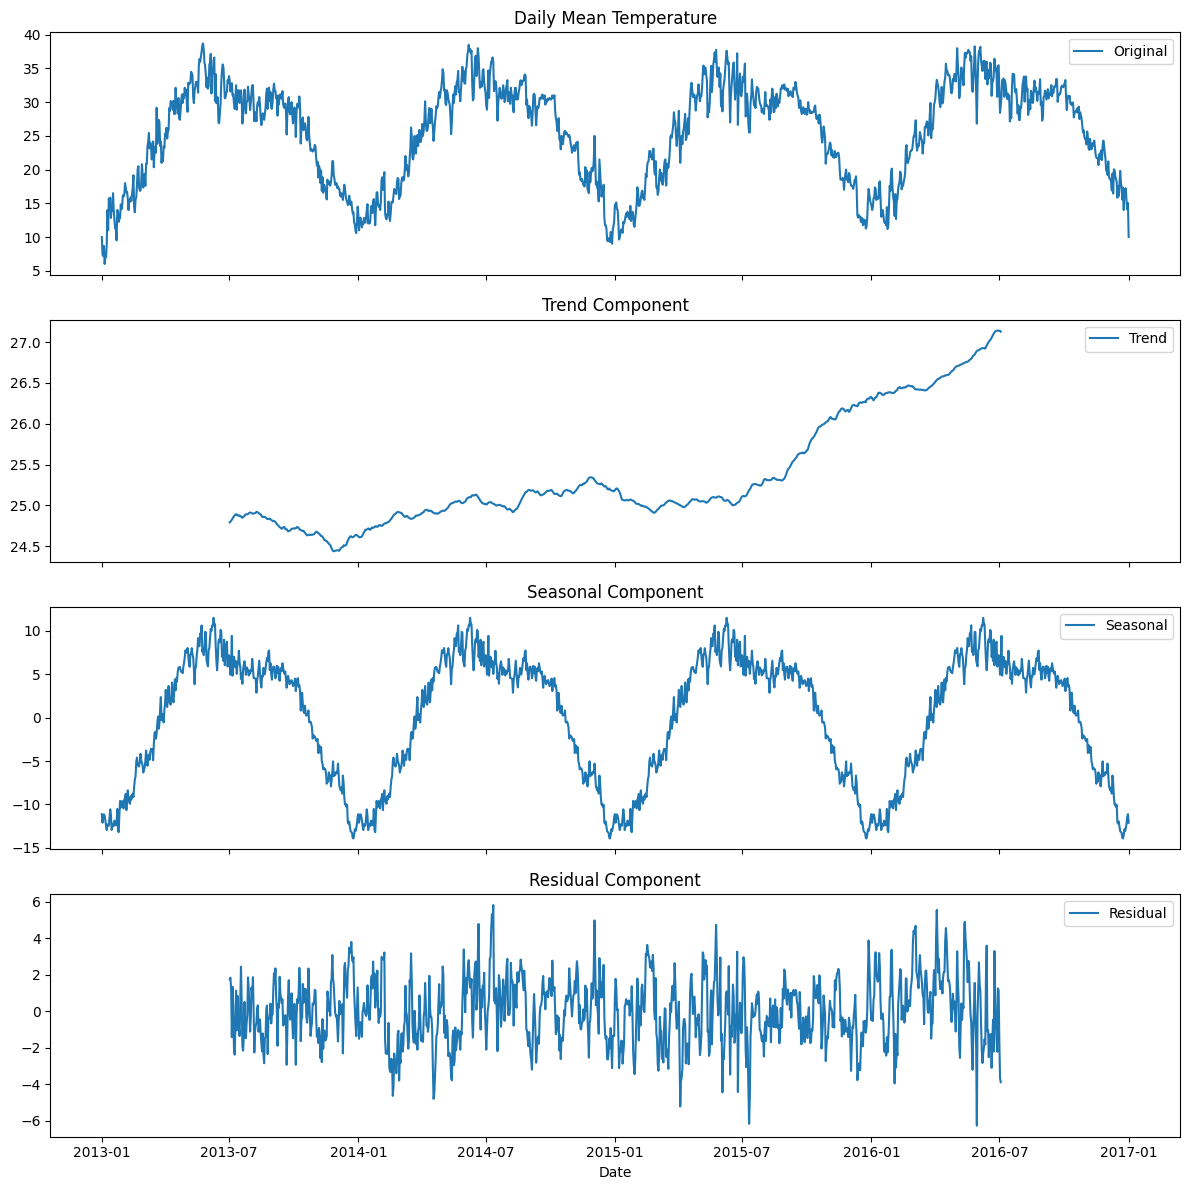

In [ ]:
!pip install statsmodels
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(train_data['meantemp'], model='additive', period=365)  # Assuming yearly seasonality

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

axes[0].plot(train_data['date'], train_data['meantemp'], label='Original')
axes[0].legend()
axes[0].set_title('Daily Mean Temperature')

axes[1].plot(train_data['date'], trend, label='Trend')
axes[1].legend()
axes[1].set_title('Trend Component')

axes[2].plot(train_data['date'], seasonal, label='Seasonal')
axes[2].legend()
axes[2].set_title('Seasonal Component')

axes[3].plot(train_data['date'], residual, label='Residual')
axes[3].legend()
axes[3].set_title('Residual Component')
axes[3].set_xlabel('Date')

plt.tight_layout()
plt.show()

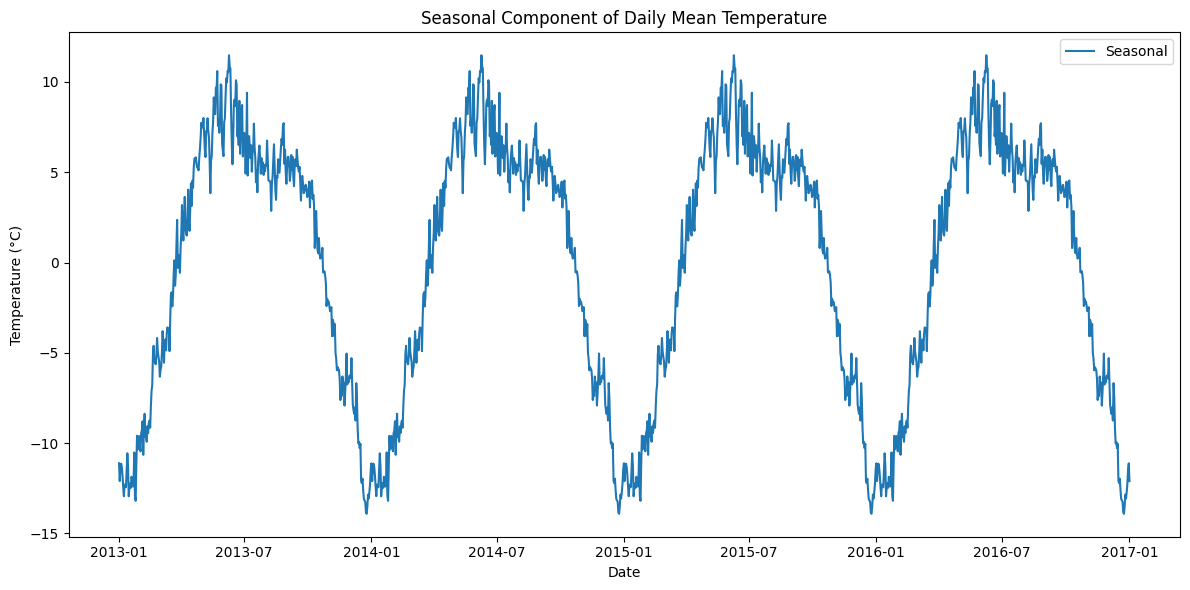

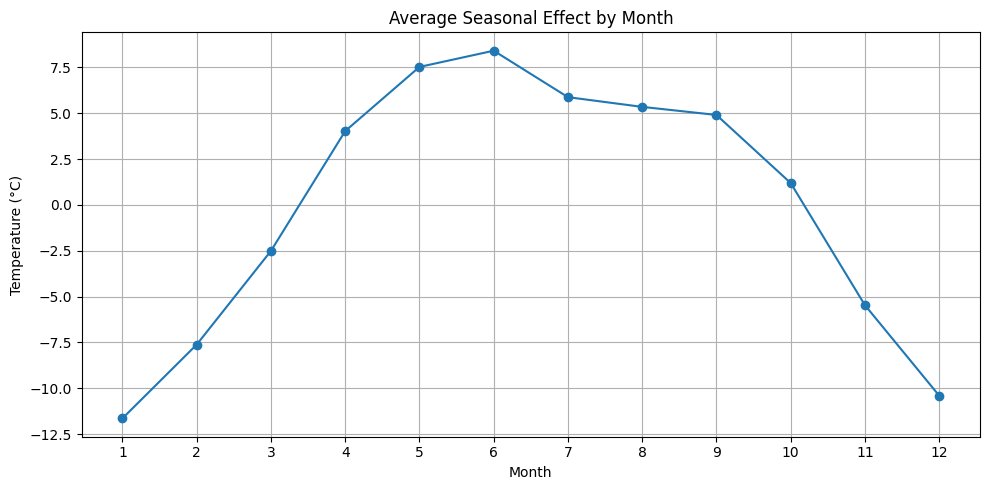

Monthly Seasonality:
month
1    -11.641907
2     -7.618327
3     -2.509443
4      4.023041
5      7.521587
6      8.405190
7      5.872197
8      5.342275
9      4.902830
10     1.189205
11    -5.469763
12   -10.403371
Name: seasonal, dtype: float64


In [ ]:
decomposition = sm.tsa.seasonal_decompose(train_data['meantemp'], model='additive', period=365)  # Assuming yearly seasonality

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 6))
plt.plot(train_data['date'], seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Component of Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

seasonal_data = pd.DataFrame({'date': train_data['date'], 'seasonal': seasonal})
seasonal_data['month'] = seasonal_data['date'].dt.month

monthly_seasonality = seasonal_data.groupby('month')['seasonal'].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_seasonality.index, monthly_seasonality.values, marker='o')
plt.title('Average Seasonal Effect by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly Seasonality:")
print(monthly_seasonality)

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'train_data' and 'test_data' are already loaded and preprocessed

# Fit STL model
forecaste_variable = 'meantemp'
stl = sm.tsa.STL(train_data[forecaste_variable], period=365)  # Assuming yearly seasonality
result = stl.fit()

# Forecast using the decomposed components
# Here, we'll use a naive forecasting approach for simplicity:
# Forecast trend: Assume the last trend value continues
# Forecast seasonal: Use the seasonal component from the last year
# Forecast resid: Assume residual is 0

# Get the last year's seasonal component
seasonal_component = result.seasonal[-365:]

# Create a forecast for the test data period
forecast_period = len(test_data)
forecast_trend = np.repeat(result.trend[-1], forecast_period)  # Repeat last trend value
forecast_seasonal = seasonal_component[:forecast_period]  # Use seasonal component from last year
forecast_resid = np.zeros(forecast_period)  # Assume residual is 0

# Combine components to get the final forecast
forecast = forecast_trend + forecast_seasonal + forecast_resid

# Evaluate forecasting performance
mae = mean_absolute_error(test_data[forecaste_variable], forecast)
rmse = np.sqrt(mean_squared_error(test_data[forecaste_variable], forecast))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 2.91
Root Mean Squared Error (RMSE): 3.55


<ipython-input-44-37f9df8f724f>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_trend = np.repeat(result.trend[-1], forecast_period)  # Repeat last trend value


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['meantemp'], order=(5, 1, 0))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit = model.fit()

In [ ]:
# Number of steps to forecast
forecast_steps = len(test_data)
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + forecast_steps - 1)

In [ ]:
rmse = np.sqrt(mean_squared_error(test_data['meantemp'], predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 11.41


**PREDICTIONS FOR NEXT YEAR**

In [ ]:
# Assuming 'model_fit' is your trained ARIMA model
# Forecast for the next year (365 days)
forecast_steps = 365
future_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + forecast_steps - 1)

# Create a date range for the next year
from pandas.tseries.offsets import DateOffset
# Get the last date in your train_data DataFrame
last_date = train_data.index[-1]  # Assuming your DataFrame has a DateTimeIndex

# Create the future dates
future_dates = pd.date_range(start=last_date + DateOffset(days=1), periods=forecast_steps, freq='D')


# Create a DataFrame for the predictions
future_df = pd.DataFrame({'date': future_dates, 'forecast': future_predictions})

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE) on Validation Set: 8.23


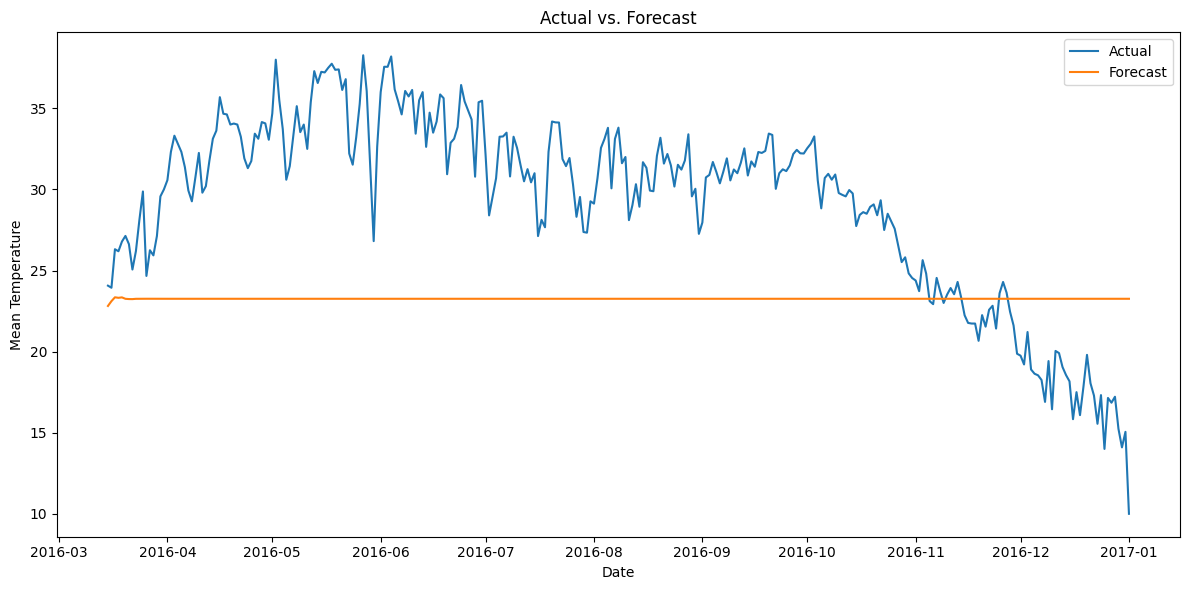

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset

# Load your train data
train_data = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
train_data['date'] = pd.to_datetime(train_data['date'], errors='coerce')
train_data = train_data.set_index('date')

# Split train data into train and validation sets
train_len = int(len(train_data) * 0.8)  # Use 80% for training, 20% for validation
train_set = train_data[:train_len]
validation_set = train_data[train_len:]

# Fit ARIMA model
forecaste_variable = 'meantemp'
model = ARIMA(train_set[forecaste_variable], order=(5, 1, 0))
model_fit = model.fit()

# Forecast for the validation set period
forecast_steps = len(validation_set)
predictions = model_fit.predict(start=len(train_set), end=len(train_set) + forecast_steps - 1)

# Evaluate forecasting performance on validation set
rmse = np.sqrt(mean_squared_error(validation_set[forecaste_variable], predictions))
print(f"Root Mean Squared Error (RMSE) on Validation Set: {rmse:.2f}")

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': validation_set[forecaste_variable], 'Forecast': predictions})
comparison_df.index = validation_set.index  # Use the original dates as index

# Plot actual vs. forecast
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual'], label='Actual')
plt.plot(comparison_df['Forecast'], label='Forecast')
plt.legend()
plt.title('Actual vs. Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.tight_layout()
plt.show()

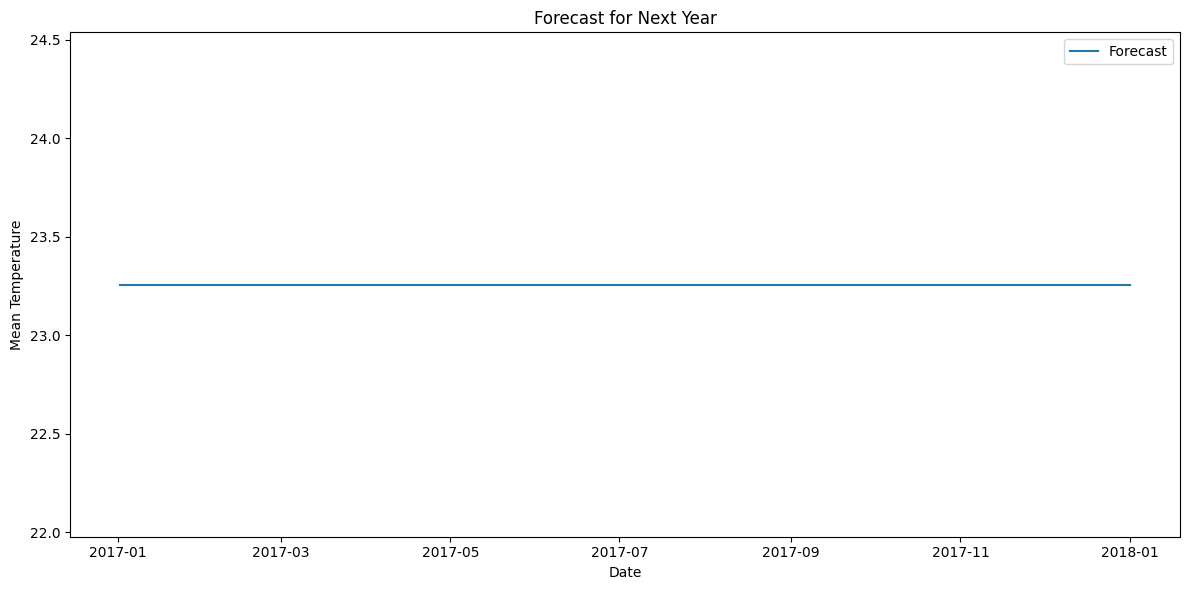

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(future_df['date'], future_df['forecast'], label='Forecast')
plt.legend()
plt.title('Forecast for Next Year')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.tight_layout()
plt.show()

**LSTM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'train_data' and 'test_data' are already loaded and preprocessed

# 1. Prepare the data for LSTM
# Select the target variable (e.g., 'meantemp')
data = train_data[['meantemp']].values.astype(float)

# Scale the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Create the training dataset
# Define the lookback period (number of previous timesteps to consider)
lookback = 10  # You can adjust this value

X_train, y_train = [], []
for i in range(lookback, len(data)):
    X_train.append(data[i - lookback:i, 0])
    y_train.append(data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data to be [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 2. Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# 3. Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)  # Adjust epochs and batch_size as needed

# 4. Make predictions
# Prepare the test data
inputs = train_data[['meantemp']][-lookback:].values.astype(float)
inputs = scaler.transform(inputs)

X_test = []
for i in range(len(test_data)):  # Change the loop range
    start_idx = i  # Calculate the starting index for slicing
    end_idx = start_idx + lookback  # Calculate the ending index for slicing

    # Check if end_idx exceeds the length of the training data
    if end_idx <= len(train_data):
        X_test.append(train_data[['meantemp']][start_idx:end_idx].values.astype(float)) # Extract data from training data

X_test = np.array(X_test)
#Reshape to 3D for LSTM
num_samples = X_test.shape[0]
num_timesteps = X_test.shape[1]
num_features = 1
X_test = X_test.reshape(num_samples, num_timesteps, num_features)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# 5. Evaluate the model
rmse = np.sqrt(mean_squared_error(test_data['meantemp'], predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# You can further visualize the predictions and actual values using matplotlib.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.1314
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0063
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0048
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0050
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0046
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0044
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0046
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0045
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0046
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0049
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0043
Epoch 13/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0041
Epoch 14/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0045
Epoch 15/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - lo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Root Mean Squared Error (RMSE): 140.82


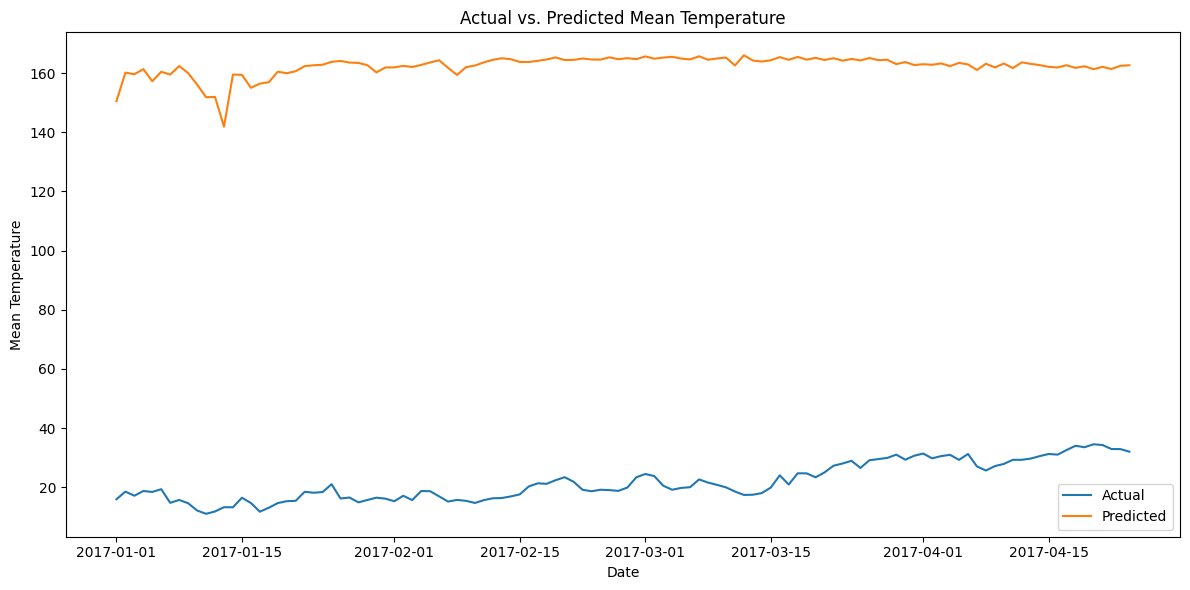

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ... (your existing code for data loading, preprocessing, model building, and training) ...

# 4. Make predictions
# Prepare the test data
inputs = train_data[['meantemp']][-lookback:].values.astype(float)
inputs = scaler.transform(inputs)

X_test = []
for i in range(len(test_data)):  # Change the loop range
    start_idx = i  # Calculate the starting index for slicing
    end_idx = start_idx + lookback  # Calculate the ending index for slicing

    # Check if end_idx exceeds the length of the training data
    if end_idx <= len(train_data):
        X_test.append(train_data[['meantemp']][start_idx:end_idx].values.astype(float)) # Extract data from training data

X_test = np.array(X_test)
#Reshape to 3D for LSTM
num_samples = X_test.shape[0]
num_timesteps = X_test.shape[1]
num_features = 1
X_test = X_test.reshape(num_samples, num_timesteps, num_features)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# 5. Evaluate the model
rmse = np.sqrt(mean_squared_error(test_data['meantemp'], predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 6. Comparison and Visualization
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': test_data['meantemp'], 'Predicted': predictions.flatten()}) # Flatten predictions
comparison_df.index = test_data['date']  # Set date as index

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual'], label='Actual')
plt.plot(comparison_df['Predicted'], label='Predicted')
plt.title('Actual vs. Predicted Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.tight_layout()
plt.show()